# Classification

In this assignment we explore classification, one of the fundamental tasks of machine learning.

In the supervised learning scenario we consider, we are given a training set of observations $x_i,\;\; i = 1,\ldots,n$ and each observation $x_i$ is associated with a label $y_i$.  For classification, this label assigns the observation to 1 of $k$ classes. In Python, we will typically use the values $0,\ldots,k-1$ for the labels.

We'll again use the wine data set, reduced to two dimensions using LDA for easy display of the results.

The first classifier we consider is the simple `nearest centroid` classifier which uses the mean of each class as a prototype for the corresponding class, and then classifies based on the nearest prototype. For  simple problems it works quite well!

The logistic regression classifier and its multi-class extension, the softmax classifier, are powerful and widely-used discriminative classification algorithms.  One place they are often found is as the last layer of a deep neural network classifier. After working through the nearest centroid classifier example in this notebook, you will train and evaluate the logistic regression/softmax classifier provided by scikit-learn, and try to interpret the models that it fits.  For more on this classifier, see http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix

from utils import nearest_feature as nf

### Load the wine data, first the training set, then the test set.

In [17]:
wine_train = np.loadtxt('./data/wine_train.txt',delimiter = ',')
wine_train_labels = wine_train[:,-1]
wine_train_classes = list(set(wine_train_labels))
wine_train_classes = np.array(wine_train_classes,dtype=int)
wine_train_labels = np.array(wine_train_labels,dtype = int)
wine_train = wine_train[:,:-1]

wine_test = np.loadtxt('./data/wine_test.txt',delimiter = ',')
wine_test_labels = wine_test[:,-1]
wine_test_classes = list(set(wine_test_labels))
wine_test_classes = np.array(wine_test_classes,dtype=int)
wine_test_labels = np.array(wine_test_labels,dtype = int)
wine_test = wine_test[:,:-1]


### LDA

Fit an LDA model to the training data, and transform the test data onto 2 LDA components


In [18]:
lda = LDA(n_components=2)
lda.fit(wine_train, wine_train_labels)
wine_train_lda = lda.transform(wine_train)
wine_test_lda = lda.transform(wine_test)

### Plot the training and test sets

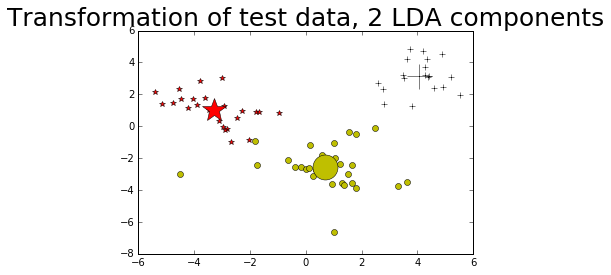

In [19]:
col = ['r*','yo','k+']
means = np.zeros((2,3))

for cl in wine_train_classes:
    cl_labels = np.array([wine_test_labels==cl]).flatten()
    wine_cl = wine_test_lda[cl_labels,:]
    
    means[:,int(cl-1)] = np.mean(wine_cl,axis=0)
   
    plt.plot(wine_cl[:,0],wine_cl[:,1],col[int(cl-1)])
    plt.plot(means[0,int(cl-1)],means[1,int(cl-1)],col[int(cl-1)],markersize=25)
means = means.T
plt.title('Transformation of test data, 2 LDA components', fontsize = 25)
plt.show()

# Confusion Matrix

The results of a classifier are often presented using a confusion matrix. The confusion matrix takes as input the true (provided) labels and the classifier's predicted labels for the observations. It then displays how the predicted labels were assigned.

scikit-learn provides us with a method to obtain a confusion matrix. But the results can also be displayed as an image - this is particularly helpful when there are many classes.  To do this, we use the function below, which is a slight adaptation of a function on the scikit-learn documentation website.


In [20]:
def plot_confusion_matrix(cm, title='Confusion matrix', target_names = np.array(['setosa', 'versicolor', 'virginica']), cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Classify, using nearest centroid classifier

With all the tools in place, we use the nearest centroid classifier to classify the observations of the test set. It does really well!

[[24  0  0]
 [ 2 26  0]
 [ 0  0 19]]


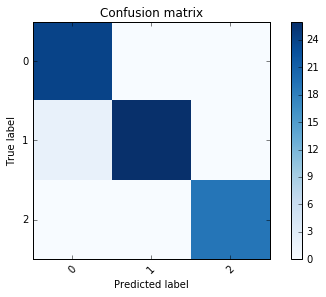

In [21]:
test_pr_labels=nf(wine_test_lda,means)
cm = confusion_matrix(wine_test_labels,test_pr_labels+1)
print(cm)
plot_confusion_matrix(cm,target_names=np.array(['0','1','2'],dtype='<U10'))

# Decision boundaries

We can now plot the decision boundaries for nearest centroid classification, using the   [scikit-learn example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

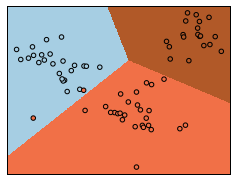

In [22]:
h = .02  # step size in the mesh
X = wine_test_lda
Y = wine_test_labels
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = nf(np.c_[xx.ravel(), yy.ravel()],means)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()